In [60]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from yahoo_fin import stock_info as si

In [61]:
df = si.get_data("AAPL")

In [62]:
df.head()

,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683,117258400.0,AAPL
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517,43971200.0,AAPL
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296,26432000.0,AAPL
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115,21610400.0,AAPL
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698,18362400.0,AAPL


In [63]:
df = df.drop(columns=['ticker'])

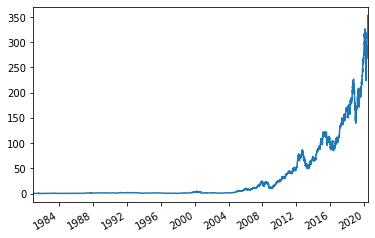

In [64]:
df['adjclose'].plot()

In [65]:
df = df.reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})

In [66]:
df.head()

,index,open,high,low,close,adjclose,volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698,18362400.0


In [67]:
df = df.rename(columns={'index':'ds', 'adjclose':'y'})

In [68]:
df.head()

,ds,open,high,low,close,y,volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698,18362400.0


In [69]:
df = df.drop(columns=['open', 'high', 'low', 'volume', 'close'])

In [70]:
df.head()

,ds,y
0,1980-12-12,0.405683
1,1980-12-15,0.384517
2,1980-12-16,0.356296
3,1980-12-17,0.365115
4,1980-12-18,0.375698


In [71]:
df = df[6000:]

In [72]:
train_df = df[:-10]

In [73]:
m = Prophet()

In [74]:
m.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
future = m.make_future_dataframe(periods=10)

In [76]:
forecast = m.predict(future)

In [77]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-09-21,2.006616,-11.698716,19.412816,2.006616,2.006616,1.716854,1.716854,1.716854,0.051166,0.051166,0.051166,1.665687,1.665687,1.665687,0.0,0.0,0.0,3.723470
1,2004-09-22,2.018978,-11.931390,19.803498,2.018978,2.018978,1.554588,1.554588,1.554588,-0.058321,-0.058321,-0.058321,1.612909,1.612909,1.612909,0.0,0.0,0.0,3.573566
2,2004-09-23,2.031340,-11.771866,20.338440,2.031340,2.031340,1.570578,1.570578,1.570578,0.015898,0.015898,0.015898,1.554680,1.554680,1.554680,0.0,0.0,0.0,3.601918
3,2004-09-24,2.043702,-12.959516,19.253997,2.043702,2.043702,1.304226,1.304226,1.304226,-0.187903,-0.187903,-0.187903,1.492129,1.492129,1.492129,0.0,0.0,0.0,3.347928
4,2004-09-27,2.080788,-11.622559,18.799253,2.080788,2.080788,1.136008,1.136008,1.136008,-0.156186,-0.156186,-0.156186,1.292193,1.292193,1.292193,0.0,0.0,0.0,3.216795


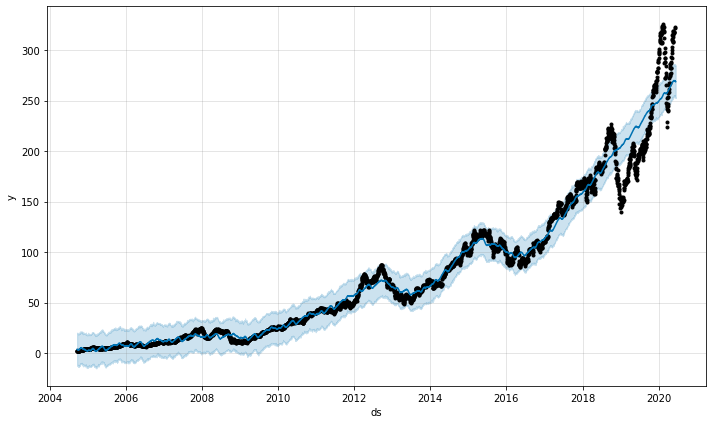

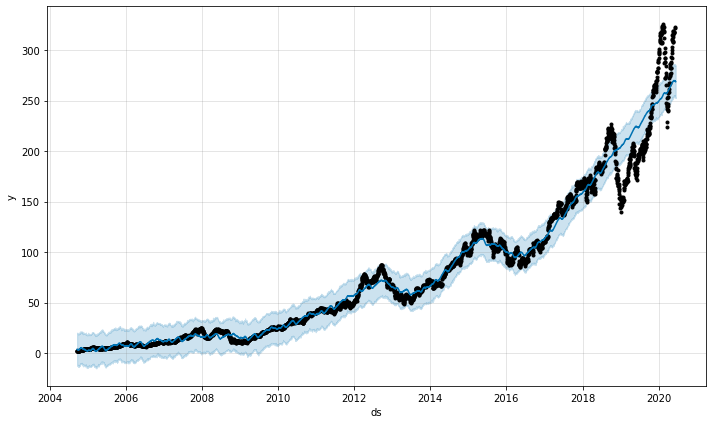

In [78]:
m.plot(forecast)

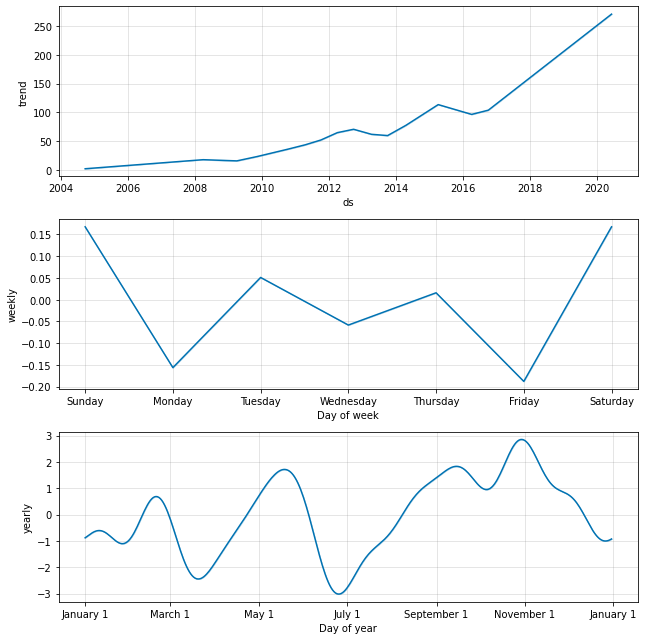

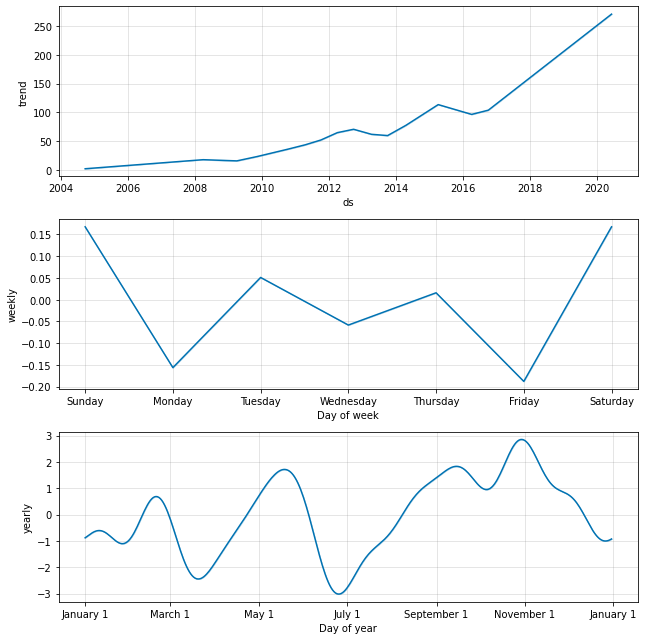

In [79]:
m.plot_components(forecast)